## Normalization and Standardization

### Transformation

#### why is it required?
Algorithms like 
1.linear regression - gradient descent - global minima
2. KNN, K means Hierarchial clustering - Eucledian distance  

Features 
f1  f2
24  56
21  100
45  67


x1,y1 = 24,54
x2,y2 = 30, 70 

To find distance, values are larger so distance is also large. so we transform these points so that our euclidean distance calculation is faster. so we try to scale down these values. all values should be scaled down these values between 0 - 1. This transformation is called min max scaling


Every point has some vectors and direction. these vectors if have huge distance, calculation would become difficult

only some algorithms require these standarization or scaling

do we require transformation in ensemble techniques like decision trees, xqboost, adaboost, random forest? 

No

What about deep learning techniques - ANN(global minima, gradient), CNN, RNN ? require standardization or scaling


#### Types of transformation

1. Normalization and Standardization
2. Scaling to MInimum and Maximum values
3. Scaling To Median And Quantiles
4. Guassian Transformation 
   Logarithmic Transformation 
   Reciprocal Trnasformation 
   Square Root Transformation 
   Exponential Trnasformation 
   Box Cox Transformation

## Standarization

we try to bring all variables or features to similar scale. standarization means centering the variable to zero
- used when data is in standard normal distribution

Z= (x-x_mean)/std

In [2]:
import pandas as pd

df = pd.read_csv(r"C:\Users\pavan\OneDrive\Desktop\prep\datasets\titanic\train.csv", usecols = ['Pclass','Age','Fare','Survived'])

In [3]:
df

,Survived,Pclass,Age,Fare
0,0,3,22.0,7.2500
1,1,1,38.0,71.2833
2,1,3,26.0,7.9250
3,1,1,35.0,53.1000
4,0,3,35.0,8.0500
...,...,...,...,...
886,0,2,27.0,13.0000
887,1,1,19.0,30.0000
888,0,3,NaN,23.4500
889,1,1,26.0,30.0000


In [4]:
df.Age.fillna(df['Age'].median(), inplace = True)

In [5]:
df.isnull().sum()

Survived    0
Pclass      0
Age         0
Fare        0
dtype: int64

In [6]:
##### Standardization - we use standardscaler from sklearn library

from sklearn.preprocessing import StandardScaler

In [9]:
scaler = StandardScaler()

# difference between fit and fit_transform
#  apply ml algorithms we use fit but if u r performing fit_ transform we are applying algorithm and changing data

df_scaled = scaler.fit_transform(df)
df_scaled
pd.DataFrame(df_scaled)

,0,1,2,3
0,-0.789272,0.827377,-0.565736,-0.502445
1,1.266990,-1.566107,0.663861,0.786845
2,1.266990,0.827377,-0.258337,-0.488854
3,1.266990,-1.566107,0.433312,0.420730
4,-0.789272,0.827377,0.433312,-0.486337
...,...,...,...,...
886,-0.789272,-0.369365,-0.181487,-0.386671
887,1.266990,-1.566107,-0.796286,-0.044381
888,-0.789272,0.827377,-0.104637,-0.176263
889,1.266990,-1.566107,-0.258337,-0.044381


In [10]:
import matplotlib.pyplot as plt
%matplotlib inline

(array([216.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 184.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 491.]),
 array([-1.56610693, -1.44643272, -1.32675851, -1.2070843 , -1.08741009,
        -0.96773588, -0.84806167, -0.72838747, -0.60871326, -0.48903905,
        -0.36936484, -0.24969063, -0.13001642, -0.01034222,  0.10933199,
         0.2290062 ,  0.34868041,  0.46835462,  0.58802883,  0.70770304,
         0.82737724]),
 <BarContainer object of 20 artists>)

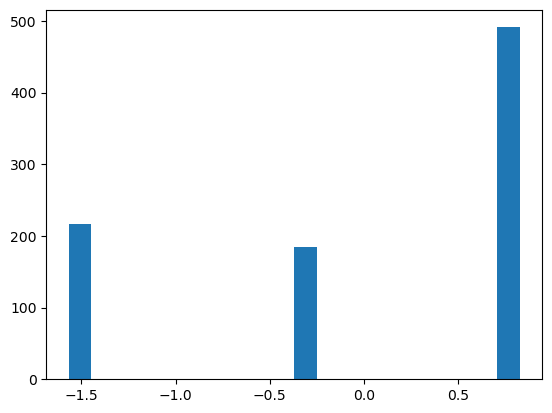

In [13]:
plt.hist(df_scaled[:,1],bins=20)

(array([ 40.,  14.,  15.,  31.,  79.,  98., 262.,  84.,  73.,  45.,  35.,
         35.,  29.,  16.,  13.,  11.,   4.,   5.,   1.,   1.]),
 array([-2.22415608, -1.91837055, -1.61258503, -1.3067995 , -1.00101397,
        -0.69522845, -0.38944292, -0.08365739,  0.22212813,  0.52791366,
         0.83369919,  1.13948471,  1.44527024,  1.75105577,  2.05684129,
         2.36262682,  2.66841235,  2.97419787,  3.2799834 ,  3.58576892,
         3.89155445]),
 <BarContainer object of 20 artists>)

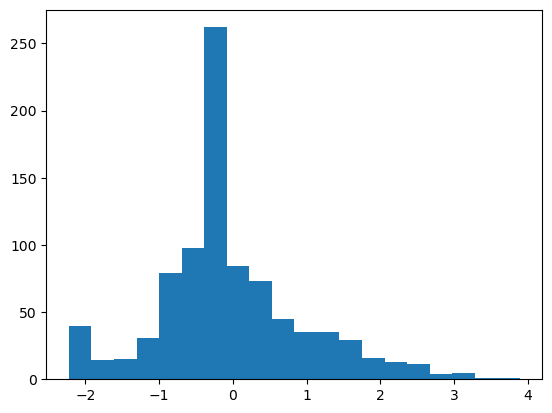

In [14]:
plt.hist(df_scaled[:,2],bins=20)

(array([562., 170.,  67.,  39.,  15.,  16.,   2.,   0.,   9.,   2.,   6.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   3.]),
 array([-0.64842165, -0.13264224,  0.38313716,  0.89891657,  1.41469598,
         1.93047539,  2.4462548 ,  2.96203421,  3.47781362,  3.99359303,
         4.50937244,  5.02515184,  5.54093125,  6.05671066,  6.57249007,
         7.08826948,  7.60404889,  8.1198283 ,  8.63560771,  9.15138712,
         9.66716653]),
 <BarContainer object of 20 artists>)

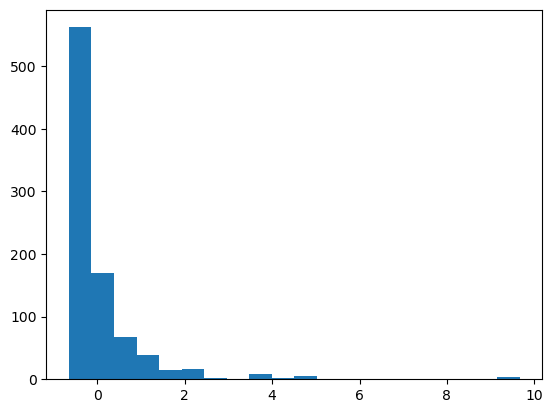

In [15]:
plt.hist(df_scaled[:,3],bins=20)

## MinMax Scaling(works well with CNN - deep learning)

This transforms the values between 0 - 1

X_scaled = (X-X.min)/(X.max - X.min)

In [18]:
from sklearn.preprocessing import MinMaxScaler

min_max = MinMaxScaler()
df_minmax = pd.DataFrame(min_max.fit_transform(df), columns = df.columns)

In [19]:
df_minmax.head()

,Survived,Pclass,Age,Fare
0,0.0,1.0,0.271174,0.014151
1,1.0,0.0,0.472229,0.139136
2,1.0,1.0,0.321438,0.015469
3,1.0,0.0,0.434531,0.103644
4,0.0,1.0,0.434531,0.015713


(array([216.,   0.,   0.,   0.,   0., 184.,   0.,   0.,   0., 491.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

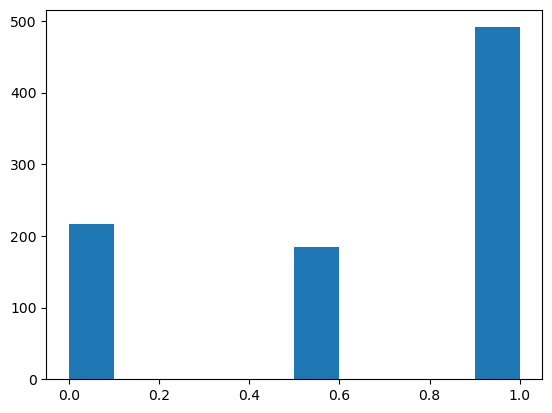

In [20]:
plt.hist(df_minmax['Pclass'])

(array([ 54.,  46., 177., 346., 118.,  70.,  45.,  24.,   9.,   2.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

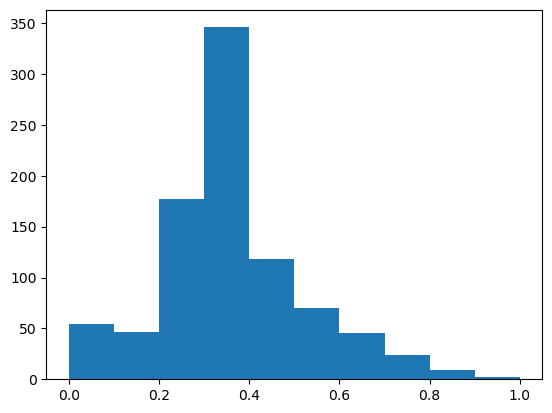

In [21]:
plt.hist(df_minmax['Age'])

(array([732., 106.,  31.,   2.,  11.,   6.,   0.,   0.,   0.,   3.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

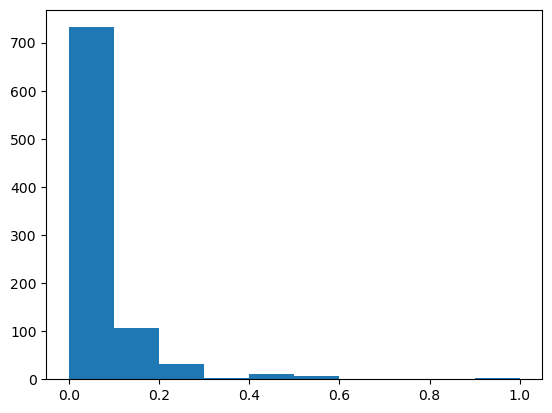

In [22]:
plt.hist(df_minmax['Fare'])

## Robust Scaler

It is used to scale the feature to median and quantiles 
Scaling using median and quantiles consists of substracting the median to all the observations, and then dividing by the interquantile difference. The interquantile difference is the difference between the 75th and 25th quantile:

IQR = 75th quantile - 25th quantile

X_scaled = (X - X.median) / IQR

0,1,2,3,4,5,6,7,8,9,10

9-90 percentile---90% of all values in this group is less than 9 
 1-10 precentile---10% of all values in this group is less than 1 4-40%

In [26]:
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()
df_robust_scaler = pd.DataFrame(scaler.fit_transform(df), columns = df.columns )

In [27]:
df_robust_scaler.head()

,Survived,Pclass,Age,Fare
0,0.0,0.0,-0.461538,-0.312011
1,1.0,-2.0,0.769231,2.461242
2,1.0,0.0,-0.153846,-0.282777
3,1.0,-2.0,0.538462,1.673732
4,0.0,0.0,0.538462,-0.277363


(array([732., 106.,  31.,   2.,  11.,   6.,   0.,   0.,   0.,   3.]),
 array([-0.62600478,  1.59286952,  3.81174382,  6.03061811,  8.24949241,
        10.46836671, 12.68724101, 14.90611531, 17.12498961, 19.3438639 ,
        21.5627382 ]),
 <BarContainer object of 10 artists>)

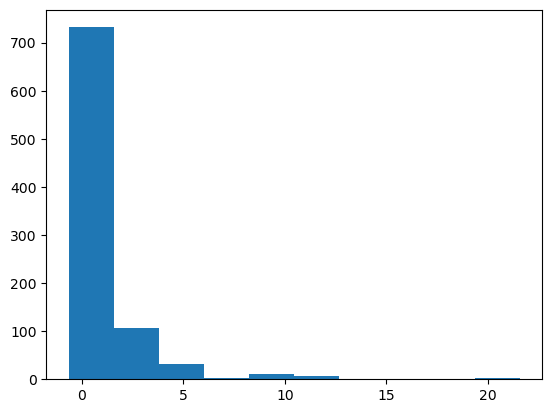

In [28]:
plt.hist(df_robust_scaler['Fare'])

(array([ 54.,  46., 177., 346., 118.,  70.,  45.,  24.,   9.,   2.]),
 array([-2.12153846, -1.50938462, -0.89723077, -0.28507692,  0.32707692,
         0.93923077,  1.55138462,  2.16353846,  2.77569231,  3.38784615,
         4.        ]),
 <BarContainer object of 10 artists>)

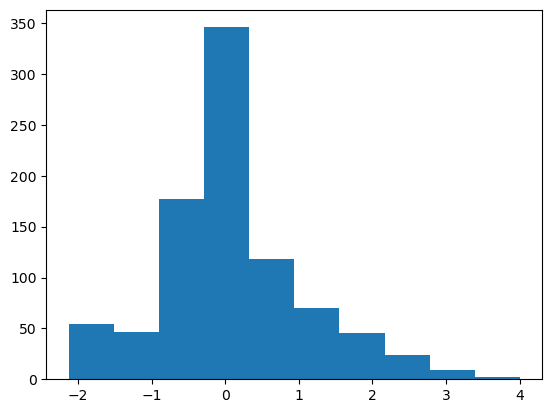

In [29]:
plt.hist(df_robust_scaler['Age'])

(array([216.,   0.,   0.,   0.,   0., 184.,   0.,   0.,   0., 491.]),
 array([-2. , -1.8, -1.6, -1.4, -1.2, -1. , -0.8, -0.6, -0.4, -0.2,  0. ]),
 <BarContainer object of 10 artists>)

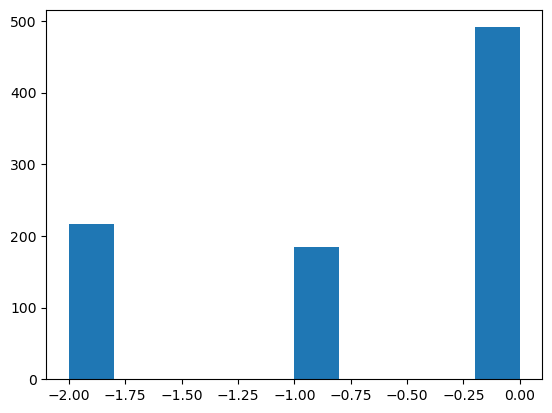

In [30]:
plt.hist(df_robust_scaler['Pclass'])

## 4.Guassian transformation

If distribution/features are not normally distributed, we can apply mathematical equations and convert them to guassian distribution

Some machine learning algorithms like linear and logistic assume that the features are normally distributed -gives good Accuracy and Performance

1. Logarithmic Transformation 
2. Reciprocal Trnasformation 
3. Square Root Transformation 
4. Exponential Trnasformation 
5. Box Cox Transformation

In [32]:
df=pd.read_csv(r"C:\Users\pavan\OneDrive\Desktop\prep\datasets\titanic\train.csv",usecols=['Age','Fare','Survived'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [35]:
df.Age.fillna(df['Age'].median(), inplace = True)

In [36]:
df.isnull().sum()

Survived    0
Age         0
Fare        0
dtype: int64

In [38]:
import scipy.stats as stat
import pylab

In [45]:
# if u want to check whether data is normally or guassian distribution -
# Q-Q plot

def plot_data(df,feature):
    plt.figure(figsize=(10,6))
    plt.subplot(1,2,1)
    df[feature].hist()
    plt.subplot(1,2,2)
    stat.probplot(df[feature],dist='norm',plot=pylab)
    plt.show()

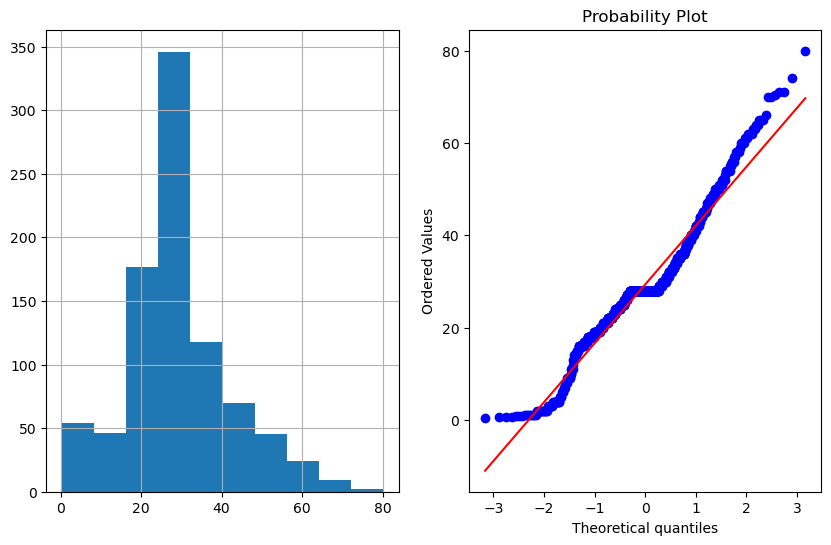

In [46]:
plot_data(df, 'Age')

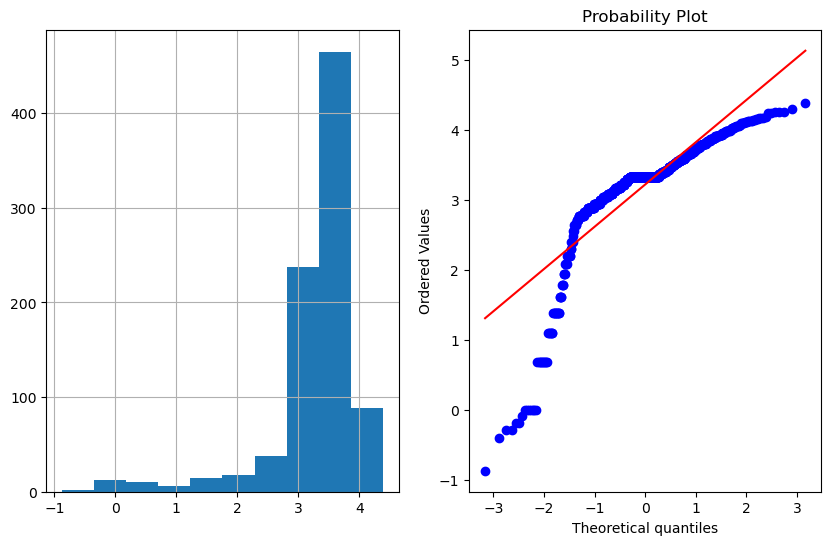

In [48]:
# Logarithmic transformation
# Logarithmic works well when data is left skewed or right skewed

import numpy as np

df['Age_log'] = np.log(df['Age'])
plot_data(df,'Age_log')

Data is not normalised hence this technique is not useful

## Reciprocal Trnasformation 

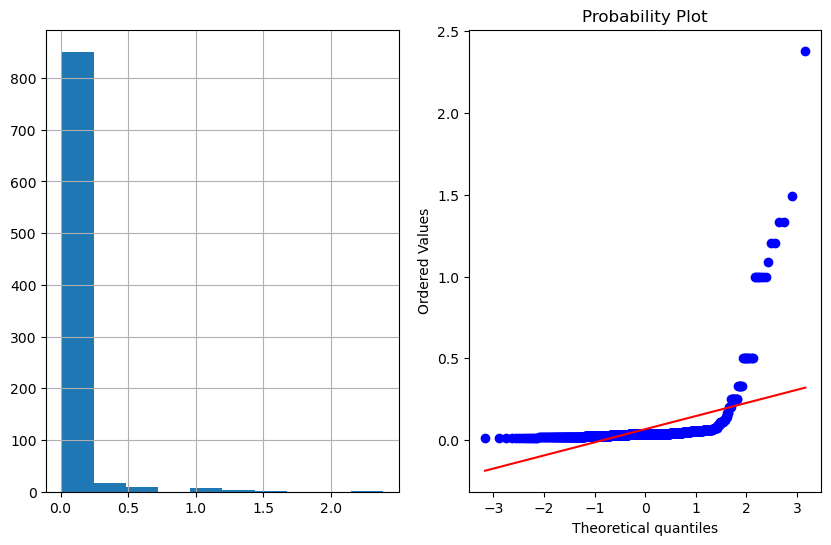

In [52]:
df['Age_reciprocal'] = 1/df.Age
plot_data(df,'Age_reciprocal')


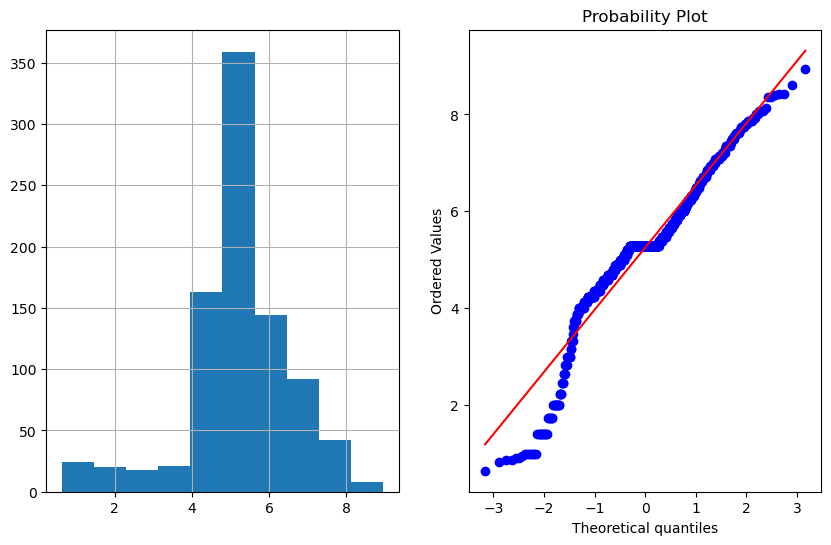

In [53]:
## Square root transformation

df['Age_square'] = df.Age**(1/2)
plot_data(df,'Age_square')

## Exponential transformation

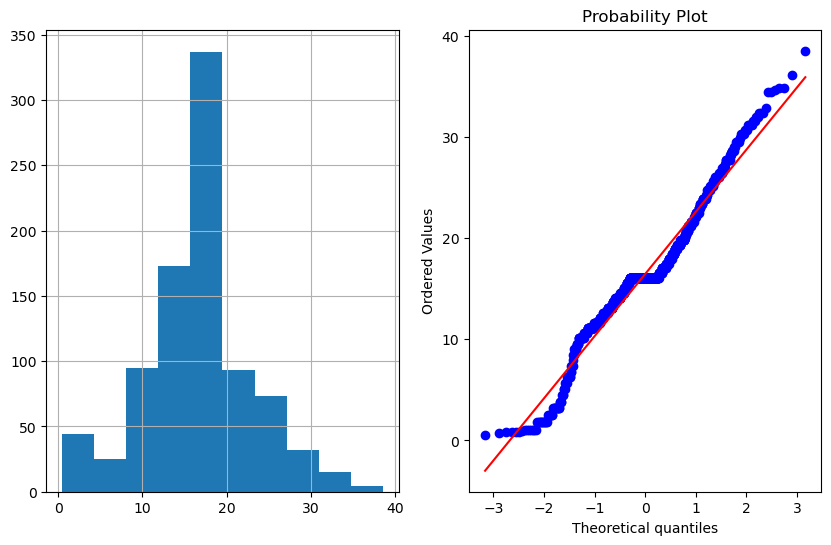

In [54]:
df['Age_exponential'] = df.Age**(1/1.2)
plot_data(df,'Age_exponential')

## Boxcox Transformation 

The Box-Cox transformation is defined as:

T(Y)=(Y exp(λ)−1)/λ

where Y is the response variable and λ is the transformation parameter. λ varies from -5 to 5. In the transformation, all values of λ are considered and the optimal value for a given variable is selected.

In [56]:
df['Age_Boxcox'], parameters = stat.boxcox(df['Age'])

In [57]:
print(parameters)

0.7964531473656952


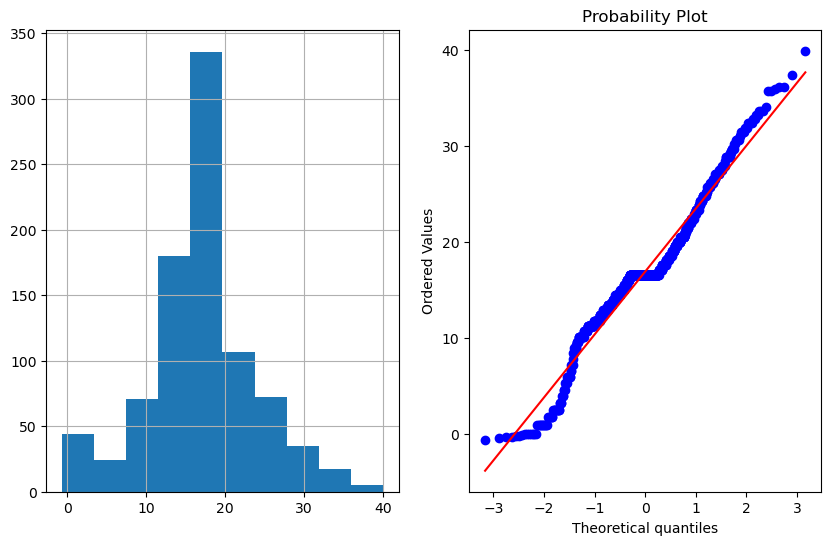

In [58]:
plot_data(df,'Age_Boxcox')

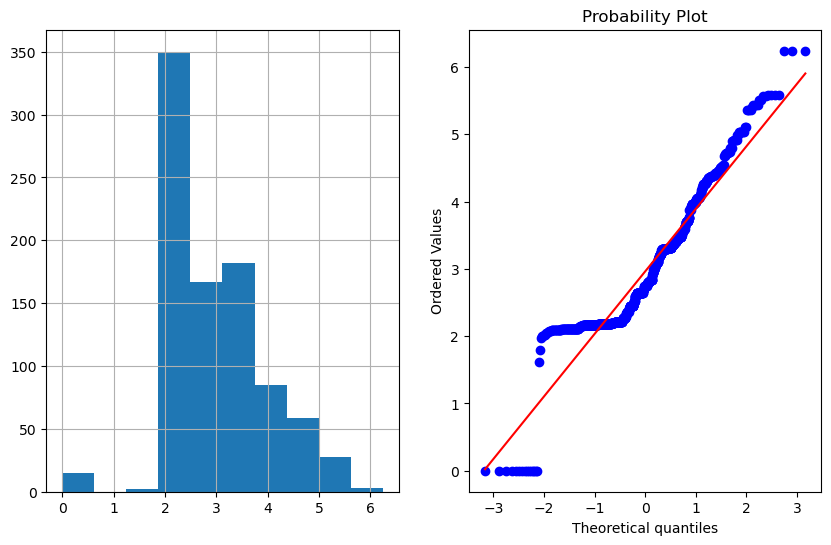

In [60]:
## Fare

df['Fare_log'] = np.log1p(df['Fare'])
plot_data(df,'Fare_log')

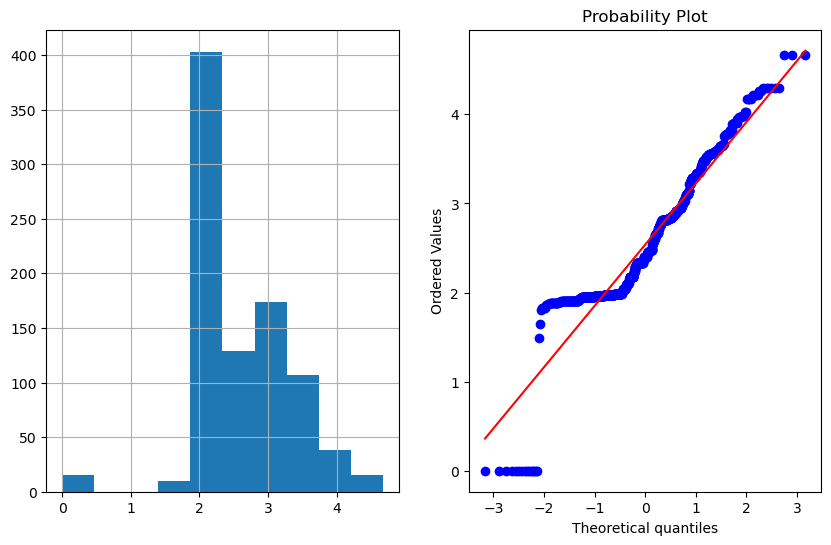

In [63]:
df['Fare_boxcox'], parameters = stat.boxcox(df['Fare']+1) # +1 is added here oin order to avoid data must be positive value error
plot_data(df,'Fare_boxcox')